In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import librosa
import librosa.display
import IPython.display as ipd

## Loading audio files

In [2]:
bad_file = "media/bad_bearing.wav"
good_file = "media/good_bearing.wav"

In [3]:
# load audio files with librosa
bad, sr = librosa.load(bad_file)
good, _ = librosa.load(good_file)

## Extract spectrograms

In [249]:
FRAME_SIZE = 1992
HOP_LENGTH = 38

bad_spec = librosa.stft(bad, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)
good_spec = librosa.stft(good, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)

In [250]:
bad_spec.shape

(997, 1161)

## Calculate Band Energy Ratio

In [251]:
def calculate_split_frequency_bin(split_frequency, sample_rate, num_frequency_bins):
    """Infer the frequency bin associated to a given split frequency."""
    
    frequency_range = sample_rate / 2
    frequency_delta_per_bin = frequency_range / num_frequency_bins
    split_frequency_bin = math.floor(split_frequency / frequency_delta_per_bin)
    return split_frequency_bin

In [252]:
split_frequency_bin = calculate_split_frequency_bin(200, 20050, 1000)
split_frequency_bin

19

In [253]:
def band_energy_ratio(spectrogram, split_frequency, sample_rate):
    """Calculate band energy ratio with a given split frequency."""
    
    split_frequency_bin = calculate_split_frequency_bin(split_frequency, sample_rate, len(spectrogram[0]))
    band_energy_ratio = []
    
    # calculate power spectrogram
    power_spectrogram = np.abs(spectrogram) ** 2
    power_spectrogram = power_spectrogram.T
    
    # calculate BER value for each frame
    for frame in power_spectrogram:
        sum_power_low_frequencies = frame[:split_frequency_bin].sum()
        sum_power_high_frequencies = frame[split_frequency_bin:].sum()
        band_energy_ratio_current_frame = sum_power_low_frequencies / sum_power_high_frequencies
        band_energy_ratio.append(band_energy_ratio_current_frame)
    
    return band_energy_ratio

In [254]:
ber_bad = band_energy_ratio(bad_spec, 2000, sr)
ber_good = band_energy_ratio(good_spec, 2000, sr)

In [255]:
len(ber_bad)

1161

## Visualise Band Energy Ratio

In [256]:
frames = range(len(ber_bad))
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

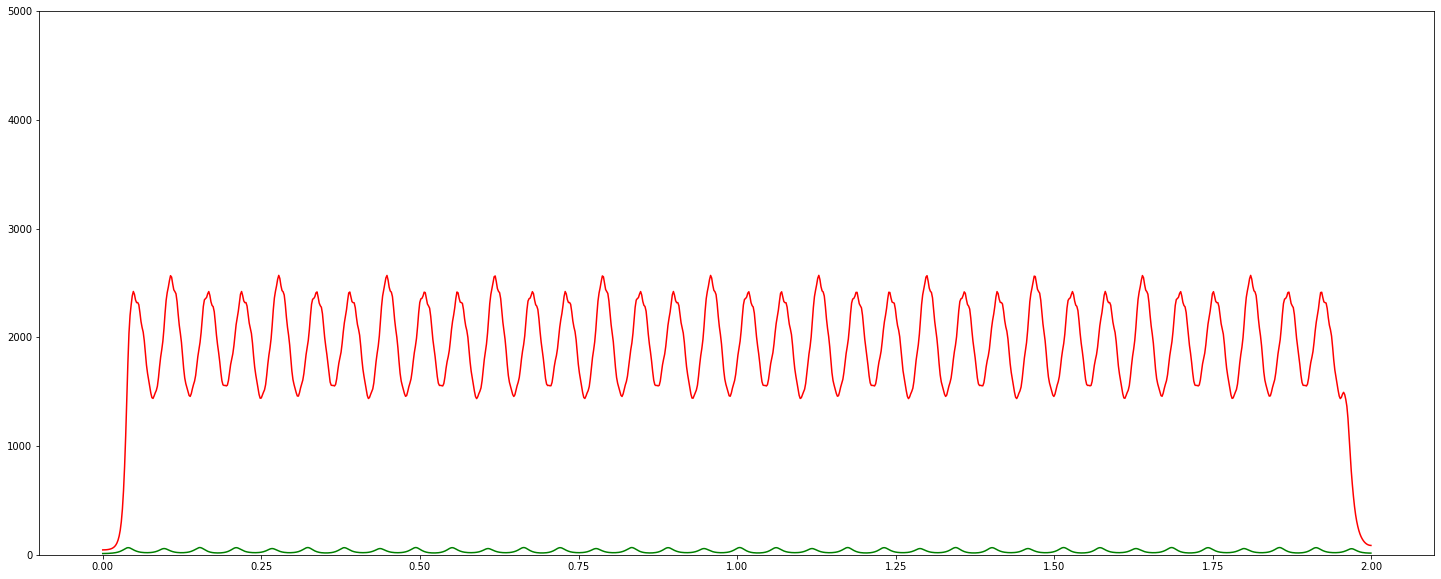

In [257]:
plt.figure(figsize=(25, 10))

plt.plot(t, ber_bad, color="r")
plt.plot(t, ber_good, color="g")
plt.ylim((0, 5000))
plt.show()